<a href="https://colab.research.google.com/github/teja-1403/iGnosis-Tech-ML-Assignment/blob/main/iGnosis_Tech_ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **iGnosis Tech Assignment**
# **Customer Segmentation & Product Analysis**
### Identifying Profitable Products and Loyal Customer Characteristics

Name: T B V SAI TEJA

**ML Internship**


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
transaction_data = pd.read_csv("/content/transaction_data.csv")
purchase_behaviour = pd.read_csv("/content/purchase_behaviour.csv")

In [12]:
# Data Cleaning
# Check for missing values in both the datasets
print("Missing values in transaction_data.csv:")
print(transaction_data.isnull().sum())
print("\nMissing values in purchase_behaviour.csv:")
print(purchase_behaviour.isnull().sum())

Missing values in transaction_data.csv:
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Missing values in purchase_behaviour.csv:
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [13]:
# Since there are no missing values, no need to perform imputation or drop missing columns. We can proceed.
# Ensure correct data types
transaction_data["TOT_SALES"] = transaction_data["TOT_SALES"].astype(float)
purchase_behaviour["LYLTY_CARD_NBR"] = purchase_behaviour["LYLTY_CARD_NBR"].astype(int)

In [14]:
# Merge the datasets on LYLTY_CARD_NBR column
merged_data = transaction_data.merge(purchase_behaviour, on="LYLTY_CARD_NBR", how="left")

In [15]:
# Top 3 most profitable products
product_sales = merged_data.groupby("PROD_NAME")["TOT_SALES"].sum().reset_index()
top_3_products = product_sales.sort_values(by="TOT_SALES", ascending=False).head(3)
print("Top 3 Most Profitable Products:")
print(top_3_products)

Top 3 Most Profitable Products:
                                   PROD_NAME  TOT_SALES
11          Dorito Corn Chp     Supreme 380g    40352.0
86    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
77  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2


In [16]:
# Analyzing customer loyalty
customer_purchases = merged_data.groupby("LYLTY_CARD_NBR")["TOT_SALES"].sum().reset_index()
most_loyal_customers = customer_purchases.sort_values(by="TOT_SALES", ascending=False).head(10)

In [17]:
# Merge to get details of loyal customers
loyal_customers_details = most_loyal_customers.merge(purchase_behaviour, on="LYLTY_CARD_NBR", how="left")

In [18]:
# Analyze the most common LIFESTAGE and PREMIUM_CUSTOMER category
loyal_customer_summary = loyal_customers_details.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).size().reset_index(name="Count")
print("\nCharacteristics of Most Loyal Customers:")
print(loyal_customer_summary.sort_values(by="Count", ascending=False))


Characteristics of Most Loyal Customers:
               LIFESTAGE PREMIUM_CUSTOMER  Count
0         OLDER FAMILIES           Budget      3
4         YOUNG FAMILIES           Budget      3
1         OLDER FAMILIES       Mainstream      1
2         OLDER FAMILIES          Premium      1
3  OLDER SINGLES/COUPLES       Mainstream      1
5         YOUNG FAMILIES          Premium      1


<ipython-input-19-c6615847da0e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_products, x="PROD_NAME", y="TOT_SALES", palette="viridis")


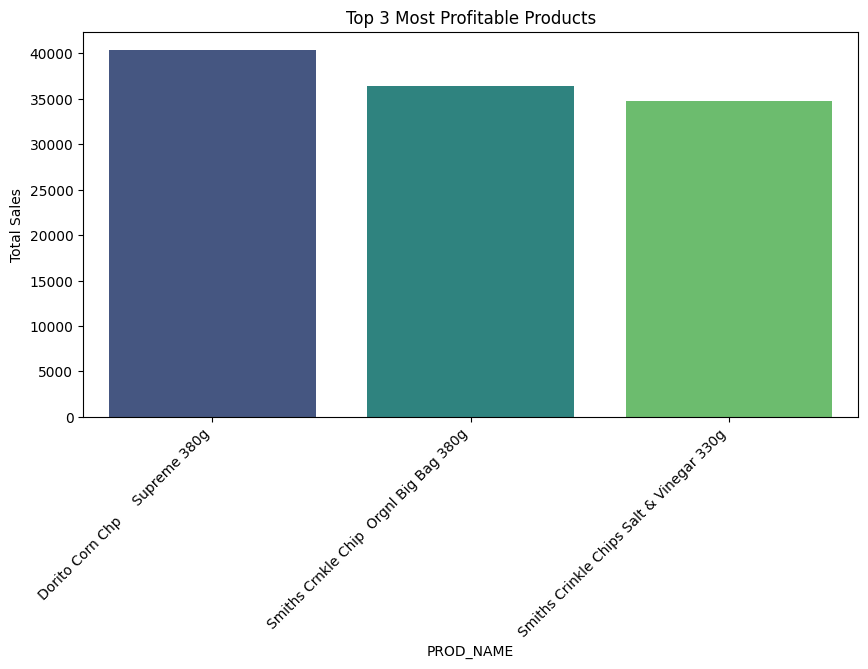

In [19]:
# Visualization using bar and count plots
plt.figure(figsize=(10, 5))
sns.barplot(data=top_3_products, x="PROD_NAME", y="TOT_SALES", palette="viridis")
plt.title("Top 3 Most Profitable Products")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Total Sales")
plt.show()

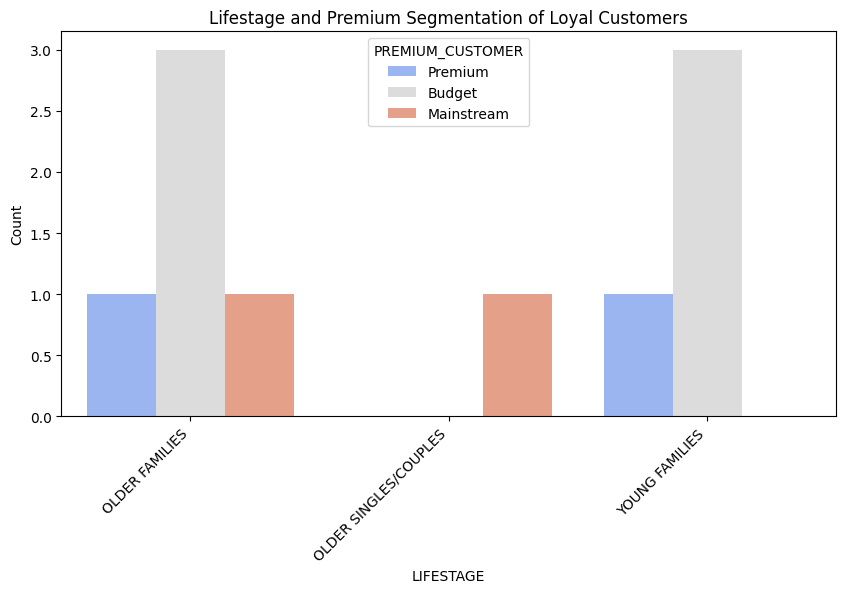

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(data=loyal_customers_details, x="LIFESTAGE", hue="PREMIUM_CUSTOMER", palette="coolwarm")
plt.title("Lifestage and Premium Segmentation of Loyal Customers")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Count")
plt.show()

---
# Analysis of Customer Purchasing Behavior Based on above outputs

1. **Brand Loyalty & Product Preference**: The top 3 most profitable products include well-known chip brands like Dorito and Smiths, indicating strong brand loyalty among customers. Familiarity with these brands, along with perceived quality and consistent taste, likely plays a key role in purchasing decisions.

2. **Family-Oriented Purchasing Trends**: Older families and young families dominate the loyal customer base. These segments often purchase in bulk, which aligns with the large pack sizes of the top-selling products. The popularity of Original and Salt & Vinegar flavors suggests that these classic choices cater to diverse family preferences.

3. **Different Spending Patterns**: Budget-conscious customers are significantly represented in the dataset, implying that affordability drives repeat purchases. Premium customers, though fewer, might be drawn to gourmet or exclusive flavors that are not reflected in the top 3 profitable products.

4. **Popular Flavors Among Customers**: The presence of Smiths Crinkle Chips in both Original and Salt & Vinegar flavors among the top sellers suggests that customers prefer well-established, widely accepted flavors. This could indicate that experimental or niche flavors might not perform as well in the mainstream market.

5. **Effect of Discounts & Promotions**: The high sales of specific chip products could be influenced by promotional campaigns, combo deals, or discounts targeted toward frequent buyers. Customers in the budget category might exhibit stronger purchasing behavior during discount periods, reinforcing the need for targeted promotions.

---
